In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2 as cv
import pandas as pd
import ntpath
import random

C:\Users\Sparsh Mahajan\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
cols = ['center' , 'left' , 'right' , 'steering' , 'throttle' , 'reverse' , 'speed']
df = pd.read_csv(r"D:\archive (40)\data-master\driving_log.csv" , names=cols)
df

,center,left,right,steering,throttle,reverse,speed
0,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
1,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
2,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
3,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
4,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
...,...,...,...,...,...,...,...
7254,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,23.381190
7255,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,23.101820
7256,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,22.780150
7257,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,22.511500


In [4]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
df['center'] = df['center'].apply(path_leaf)
df['left'] = df['left'].apply(path_leaf)
df['right'] = df['right'].apply(path_leaf)
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_10_17_16_36_30_865.jpg,left_2018_10_17_16_36_30_865.jpg,right_2018_10_17_16_36_30_865.jpg,0.0,0.0,0.0,0.000078
1,center_2018_10_17_16_36_30_966.jpg,left_2018_10_17_16_36_30_966.jpg,right_2018_10_17_16_36_30_966.jpg,0.0,0.0,0.0,0.000078
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.0,0.0,0.0,0.000079
3,center_2018_10_17_16_36_31_253.jpg,left_2018_10_17_16_36_31_253.jpg,right_2018_10_17_16_36_31_253.jpg,0.0,0.0,0.0,0.000078
4,center_2018_10_17_16_36_31_366.jpg,left_2018_10_17_16_36_31_366.jpg,right_2018_10_17_16_36_31_366.jpg,0.0,0.0,0.0,0.000079


<BarContainer object of 25 artists>

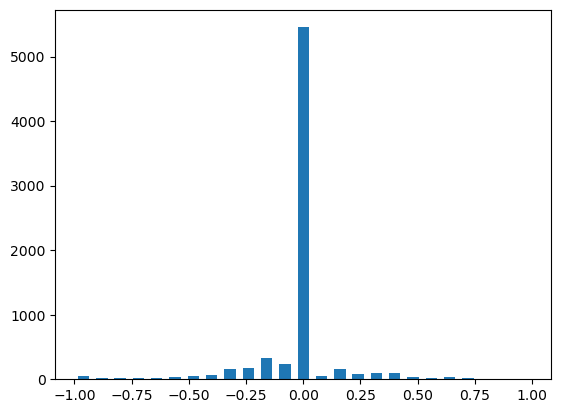

In [5]:
num=25
hist , bins = np.histogram(df['steering'] , num)
center = (bins[:-1]+ bins[1:])*0.5
plt.bar(center , hist , width=0.05)

In [6]:
sample_per_bin = 400
rmv = []
for j in range(num):
    lst = []
    for i in range(len(df['steering'])):
        if df['steering'][i]>=bins[j] and df['steering'][i]<=bins[j+1]:
            lst.append(i)
    lst = shuffle(lst)
    lst = lst[sample_per_bin:]
    rmv.extend(lst)

df.drop(df.index[rmv] , inplace=True)
print("remaining" , len(df))

remaining 2205


<BarContainer object of 25 artists>

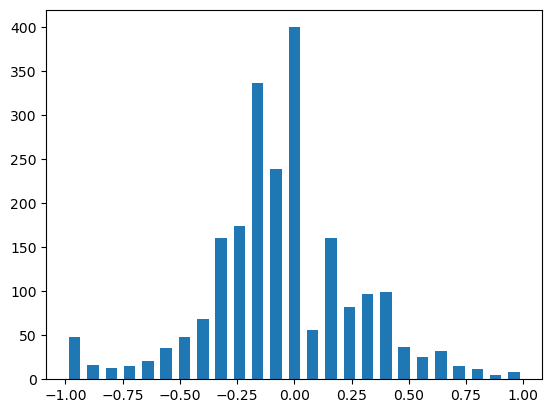

In [7]:
hist , bins = np.histogram(df['steering'] , num)
center = (bins[:-1]+ bins[1:])*0.5
plt.bar(center , hist , width=0.05)

In [10]:
carl_pearson_skew = ((np.mean(df['steering'])-np.median(df['steering']))*3)/np.std(df['steering'])
carl_pearson_skew ## lightly negativly skew

0.15143897856335242

In [8]:
df['center']

16      center_2018_10_17_16_36_32_765.jpg
24      center_2018_10_17_16_36_33_682.jpg
26      center_2018_10_17_16_36_33_915.jpg
28      center_2018_10_17_16_36_34_171.jpg
29      center_2018_10_17_16_36_34_282.jpg
                       ...                
7183    center_2018_10_17_21_29_04_518.jpg
7184    center_2018_10_17_21_29_04_632.jpg
7249    center_2018_10_17_21_29_12_189.jpg
7254    center_2018_10_17_21_29_12_803.jpg
7257    center_2018_10_17_21_29_13_191.jpg
Name: center, Length: 2205, dtype: object

In [9]:
img_arr = np.asarray(df[['center' , 'left' , 'right']])
steering_arr = np.asarray(df['steering'])

In [10]:
img_arr

array([['center_2018_10_17_16_36_32_765.jpg',
        'left_2018_10_17_16_36_32_765.jpg',
        'right_2018_10_17_16_36_32_765.jpg'],
       ['center_2018_10_17_16_36_33_682.jpg',
        'left_2018_10_17_16_36_33_682.jpg',
        'right_2018_10_17_16_36_33_682.jpg'],
       ['center_2018_10_17_16_36_33_915.jpg',
        'left_2018_10_17_16_36_33_915.jpg',
        'right_2018_10_17_16_36_33_915.jpg'],
       ...,
       ['center_2018_10_17_21_29_12_189.jpg',
        'left_2018_10_17_21_29_12_189.jpg',
        'right_2018_10_17_21_29_12_189.jpg'],
       ['center_2018_10_17_21_29_12_803.jpg',
        'left_2018_10_17_21_29_12_803.jpg',
        'right_2018_10_17_21_29_12_803.jpg'],
       ['center_2018_10_17_21_29_13_191.jpg',
        'left_2018_10_17_21_29_13_191.jpg',
        'right_2018_10_17_21_29_13_191.jpg']], dtype=object)

In [11]:

def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left, right = indexed_data['center'], indexed_data['left'], indexed_data['right']
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data['steering']))
    # left image append
        image_path.append(os.path.join(datadir,left.strip()))
        steering.append(float(indexed_data['steering'])+0.15)
    # right image append
        image_path.append(os.path.join(datadir,right.strip()))
        steering.append(float(indexed_data['steering'])-0.15)
        image_paths = np.asarray(image_path)
        steerings = np.asarray(steering)
    return image_paths, steerings
     

In [25]:
image_arr, steerings_arr = load_img_steering(r"D:\archive (40)\data-master\IMG", df)
X_train, X_valid, y_train, y_valid = train_test_split(image_arr, steerings_arr, test_size=0.2, random_state=6)

In [26]:
X_train

array(['D:\\archive (40)\\data-master\\IMG\\right_2018_10_17_16_37_10_782.jpg',
       'D:\\archive (40)\\data-master\\IMG\\center_2018_10_17_21_25_08_008.jpg',
       'D:\\archive (40)\\data-master\\IMG\\left_2018_10_17_21_24_44_665.jpg',
       ...,
       'D:\\archive (40)\\data-master\\IMG\\center_2018_10_17_16_40_37_251.jpg',
       'D:\\archive (40)\\data-master\\IMG\\right_2018_10_17_16_36_50_988.jpg',
       'D:\\archive (40)\\data-master\\IMG\\left_2018_10_17_16_42_35_781.jpg'],
      dtype='<U66')

In [22]:
image_arr

array(['D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/center_2018_10_17_16_36_30_865.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/left_2018_10_17_16_36_30_865.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/right_2018_10_17_16_36_30_865.jpg',
       ...,
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/center_2018_10_17_21_29_13_191.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/left_2018_10_17_21_29_13_191.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/right_2018_10_17_21_29_13_191.jpg'],
      dtype='<U84')

In [16]:
indexed_data = df.iloc[0]
indexed_data['steering']

0.0

In [19]:
X_train

array(['D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/right_2018_10_17_16_37_13_727.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/center_2018_10_17_21_25_09_623.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/left_2018_10_17_21_24_49_129.jpg',
       ...,
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/center_2018_10_17_16_40_38_326.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/right_2018_10_17_16_36_51_936.jpg',
       'D:/home/aman-py/Desktop/Self-Driving-Car/data/IMG/left_2018_10_17_16_42_34_663.jpg'],
      dtype='<U84')

In [15]:
from imgaug import augmenters as iaa

In [27]:
def zoom(img):
    zoom = iaa.Affine(scale=(1 , 1.3))
    image = zoom.augment_image(img)
    return image


def pan(img):
    pan= iaa.Affine(translate_percent={'x' : (-0.1 , 0.1) , 'y':(-0.1 , 0.1)})
    image = pan.augment_image(img)
    return image

def bright(img):
    bri = iaa.Multiply((0.2 , 1.2))
    image = bri.augment_image(img)
    return image
def flip(img , angle):
    fl = cv.flip(img , 1)
    angle  = -angle
    return fl , angle

In [28]:
def augment(img , angle):
    image =mpimg.imread(img)
    if np.random.rand()<0.5:
        image = zoom(image)
    elif np.random.rand()<0.5:
        image = bright(image)
    elif np.random.rand()<0.5:
        image = pan(image)
    elif np.random.rand()<0.5:
        image , angle = flip(image , angle)
    return image , angle

In [29]:
def img_preprocess(img):
    img = img[60 : 135 , : , :]
    img = cv.cvtColor(img , cv.COLOR_RGB2YUV)
    img = cv.GaussianBlur(img , (3 , 3) , 0)
    img = cv.resize(img , (200 , 66))
    img = img/255
    return img

In [30]:
def batch_g(image_arr, steerings_arr, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = np.random.randint(0, len(image_arr) - 1)

            if istraining:
                im, steering = augment(image_arr[random_index], steerings_arr[random_index])

            else:
                im = plt.imread(image_arr[random_index])
                steering = steerings_arr[random_index]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))
    
    


In [31]:
xtrain_gen, ytrain_gen = next(batch_g(X_train, y_train, 15, 1))
xvalid_gen, yvalid_gen = next(batch_g(X_valid, y_valid, 1, 0))
     

Text(0.5, 1.0, 'Validation Image')

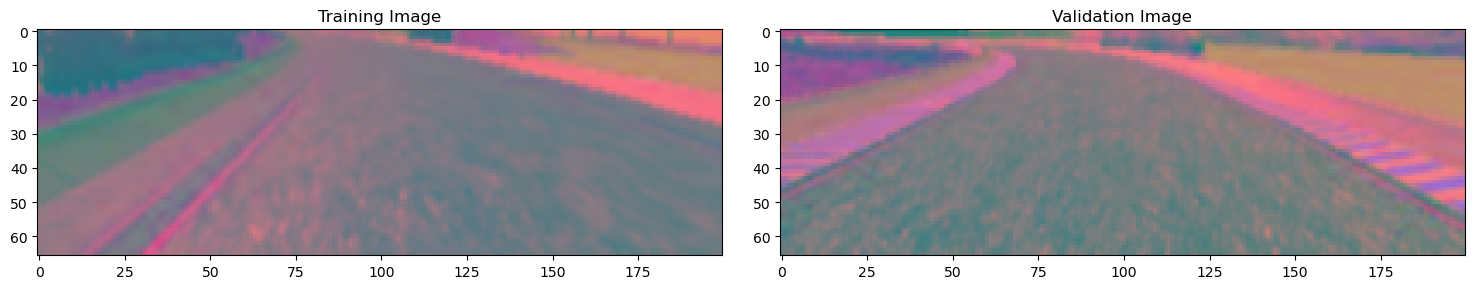

In [32]:
xtrain_gen, ytrain_gen = next(batch_g(X_train, y_train, 15, 1))
xvalid_gen, yvalid_gen = next(batch_g(X_valid, y_valid, 1, 0))
     
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(xtrain_gen[14])
axs[0].set_title('Training Image')

axs[1].imshow(xvalid_gen[0])
axs[1].set_title('Validation Image')

In [33]:
len(image_arr)

6615

In [34]:
len(steering_arr)

2205

In [35]:
def model():
    model = Sequential()
    model.add(Conv2D(24 , (5 , 5) , strides=(2 , 2) , input_shape=(66 , 200 , 3) , activation='elu'))
    model.add(Conv2D(36 , (5 , 5) , strides=(2 , 2) , activation='elu') )
    model.add(Conv2D(48 , (5 , 5) , strides=(2 , 2)  , activation='elu') )
    model.add(Conv2D(64 , (5 , 5) , strides=(2 , 2) )) 
    model.add(Dropout(0.5))
    model.add(Flatten()) ,
    model.add(Dense(100 , activation='elu') )
    model.add(Dense(50 , activation='elu'))
    model.add(Dense(10 , activation='elu'))
    model.add(Dense(1))
          
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [40]:
m = model()

In [43]:
history = m.fit(
    batch_g(X_train, y_train, 400, 1), 
    steps_per_epoch=300 ,
    epochs=7, 
    validation_data = batch_g(X_valid, y_valid, 150, 0) ,
    validation_steps=200 ,
    shuffle =1 )


Epoch 1/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 2/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.0400 - val_mean_squared_error: 0.0400


Text(0.5, 0, 'epoch')

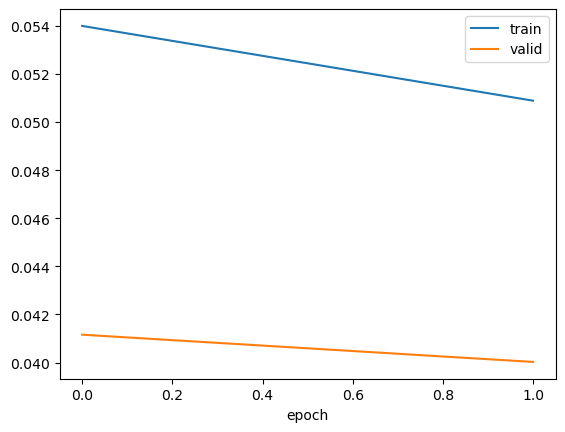

In [44]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['train' , 'valid'])
plt.xlabel('epoch')

In [45]:
m.save('car-model_2.h5' , save_format='h5')

In [81]:
tf.keras.models.load_model('car-model.h5')

<Sequential name=sequential_11, built=True>

In [74]:
m.get_config()

{'name': 'sequential_10',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 66, 200, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_10'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d_40',
    'trainable': True,
    'dtype': 'float32',
    'filters': 24,
    'kernel_size': (5, 5),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'elu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': N

In [84]:
m.predict(xvalid_gen)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


array([[-0.2085982 ],
       [-0.02217425],
       [ 0.23207173],
       [-0.00841981],
       [ 0.16497476],
       [-0.23277918],
       [-0.20622922],
       [ 0.19491377],
       [-0.09317917],
       [-0.00310406],
       [-0.3273287 ],
       [ 0.2461954 ],
       [ 0.21931908],
       [-0.2798753 ],
       [ 0.20039609],
       [-0.23959762],
       [ 0.23469034],
       [-0.36734298],
       [-0.15968494],
       [ 0.34648356],
       [-0.09766215],
       [-0.18424484],
       [ 0.4359196 ],
       [-0.03844473],
       [-0.19966662],
       [-0.3353274 ],
       [-0.09500306],
       [-0.32297653],
       [ 0.0352363 ],
       [-0.36658522],
       [ 0.27933487],
       [ 0.08125472],
       [-0.23840155],
       [ 0.17144033],
       [-0.0356186 ],
       [ 0.29704657],
       [-0.20037508],
       [-0.4095812 ],
       [-0.28426054],
       [ 0.14481577],
       [-0.28025046],
       [ 0.06731343],
       [-0.29486126],
       [-0.53472316],
       [-0.09221274],
       [-0

In [85]:
yvalid_gen

array([ 0.3210997 ,  0.15      ,  0.249228  , -0.09234901,  0.15      ,
        0.1034544 , -0.3573597 ,  0.0409824 ,  0.15      , -0.1755693 ,
       -0.2400528 ,  0.        ,  0.15      , -0.2827353 ,  0.1809627 ,
       -0.1490445 ,  0.15      , -0.4058517 , -0.1739646 ,  0.2726655 ,
       -0.354588  , -0.1091481 , -0.07088614, -0.0458187 , -0.3688194 ,
       -0.2304975 , -0.3777306 , -0.365466  , -0.094606  , -0.3129894 ,
       -0.0477675 ,  0.        , -0.5631708 ,  0.1518687 , -0.15      ,
        0.22832014, -0.15      , -0.2993634 , -0.5850843 ,  0.4783107 ,
        0.0502728 ,  0.15      , -0.504312  , -0.3677094 ,  0.        ,
        0.0643074 , -0.2880102 ,  0.        ,  0.3409824 , -0.2914152 ,
       -0.08877359, -0.0863019 , -0.143541  ,  0.5284608 , -0.2167659 ,
       -0.22177411,  0.1287843 ,  0.0670584 , -0.0279915 ,  0.15      ])

<BarContainer object of 25 artists>

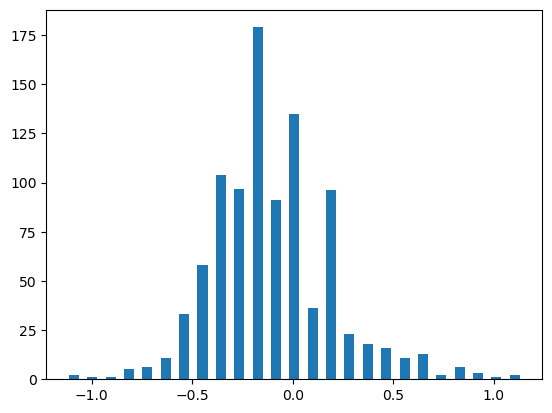

In [88]:
hist , bins = np.histogram(y_valid , num)
center = (bins[:-1]+ bins[1:])*0.5
plt.bar(center , hist , width=0.05)